## NLP와 CNN
#### 자연어처리와 이미지처리

In [5]:
import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [6]:
vocab_size = 10000
(X_train, y_train), (X_test, y_test) = datasets.imdb.load_data(num_words=vocab_size)

In [9]:
print(X_train[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [10]:
print(y_train[0])

1


In [12]:
len(X_train[0])

218

In [13]:
# 패딩처리
max_len = 200
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [14]:
X_train.shape, X_test.shape

((25000, 200), (25000, 200))

In [28]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dropout, Conv1D, GlobalMaxPooling1D, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

In [17]:
# Embedding layer 추가(벡터화 처리)
model = Sequential()
model.add(Embedding(vocab_size, 256))
model.add(Conv1D(256, 3, padding='valid', activation='relu'))
# dropout 또는 pooling 진행 가능
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation='sigmoid'))

In [18]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 256)         2560000   
                                                                 
 conv1d (Conv1D)             (None, None, 256)         196864    
                                                                 
 global_max_pooling1d (Glob  (None, 256)               0         
 alMaxPooling1D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 257       
                                                                 
Total params: 2757121 (10.52 MB)
Trainable params: 2757121 (10.52 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# 모델학습
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [22]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/10
781/782 [============================>.] - ETA: 0s - loss: 0.3248 - acc: 0.8596
Epoch 1: val_acc improved from -inf to 0.87788, saving model to best_model.h5
782/782 [==============================] - 99s 127ms/step - loss: 0.3247 - acc: 0.8597 - val_loss: 0.2824 - val_acc: 0.8779
Epoch 2/10
  2/782 [..............................] - ETA: 39s - loss: 0.1230 - acc: 0.9531

/Users/jeon-yewon/miniforge3/envs/tensorflow/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


781/782 [============================>.] - ETA: 0s - loss: 0.1597 - acc: 0.9411
Epoch 2: val_acc improved from 0.87788 to 0.89068, saving model to best_model.h5
782/782 [==============================] - 82s 105ms/step - loss: 0.1597 - acc: 0.9411 - val_loss: 0.2637 - val_acc: 0.8907
Epoch 3/10
781/782 [============================>.] - ETA: 0s - loss: 0.0547 - acc: 0.9861
Epoch 3: val_acc did not improve from 0.89068
782/782 [==============================] - 89s 114ms/step - loss: 0.0547 - acc: 0.9861 - val_loss: 0.3026 - val_acc: 0.8878
Epoch 4/10
782/782 [==============================] - ETA: 0s - loss: 0.0134 - acc: 0.9984
Epoch 4: val_acc did not improve from 0.89068
782/782 [==============================] - 94s 120ms/step - loss: 0.0134 - acc: 0.9984 - val_loss: 0.3503 - val_acc: 0.8873
Epoch 5/10
781/782 [============================>.] - ETA: 0s - loss: 0.0028 - acc: 0.9999
Epoch 5: val_acc did not improve from 0.89068
782/782 [==============================] - 95s 121ms/ste

In [25]:
loaded_model = load_model('best_model.h5')
print('test acc : %.4f' %(loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 31s 40ms/step - loss: 0.2637 - acc: 0.8907
test acc : 0.8907


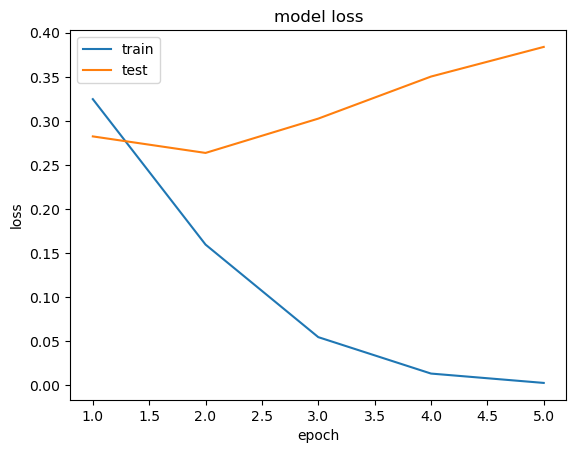

In [26]:
import matplotlib.pyplot as plt
epochs = range(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

In [29]:
# 모델 개선
model = Sequential()
model.add(Embedding(vocab_size, 256))

model.add(Conv1D(128, 3, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(128, 4, padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, padding='valid', activation='relu'))
model.add(BatchNormalization())

model.add(Dropout(0.5))

model.add(GlobalMaxPooling1D())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

In [30]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=3)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [32]:
history = model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test), callbacks=[es, mc])

Epoch 1/5
782/782 [==============================] - ETA: 0s - loss: 0.3204 - acc: 0.8698
Epoch 1: val_acc improved from 0.82980 to 0.85684, saving model to best_model.h5
782/782 [==============================] - 217s 277ms/step - loss: 0.3204 - acc: 0.8698 - val_loss: 0.3572 - val_acc: 0.8568
Epoch 2/5
782/782 [==============================] - ETA: 0s - loss: 0.2414 - acc: 0.9080
Epoch 2: val_acc improved from 0.85684 to 0.86220, saving model to best_model.h5
782/782 [==============================] - 229s 293ms/step - loss: 0.2414 - acc: 0.9080 - val_loss: 0.3246 - val_acc: 0.8622
Epoch 3/5
782/782 [==============================] - ETA: 0s - loss: 0.1845 - acc: 0.9338
Epoch 3: val_acc did not improve from 0.86220
782/782 [==============================] - 230s 294ms/step - loss: 0.1845 - acc: 0.9338 - val_loss: 0.3358 - val_acc: 0.8505
Epoch 4/5
782/782 [==============================] - ETA: 0s - loss: 0.1397 - acc: 0.9481
Epoch 4: val_acc did not improve from 0.86220
782/782 [==

In [34]:
loaded_model = load_model('best_model.h5')
print('test acc : %.4f' %(loaded_model.evaluate(X_test, y_test)[1]))

782/782 [==============================] - 44s 56ms/step - loss: 0.3246 - acc: 0.8622
test acc : 0.8622


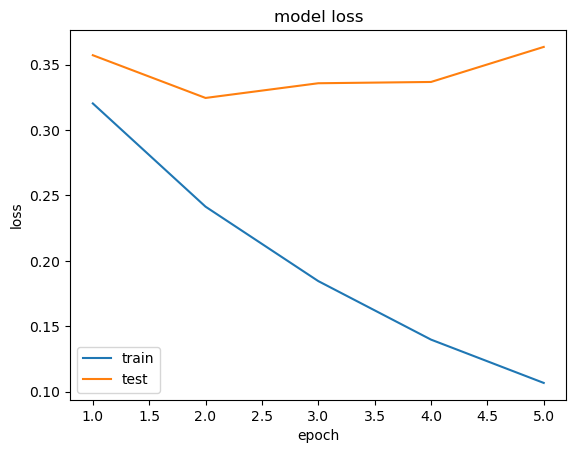

In [35]:
epochs = range(1, len(history.history['loss'])+1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

## 효율적인 최적의 모델 구조 찾기
- 하이퍼파라미터 튜닝 : Grid search, Random search, Bayesian Optimization), Hapyerband
- 자동 머신러닝(AutoML) : Auto-keras, AutoML, NAS(Nural Architecture Search)
- 전이학습(Transfer Learning) : 사전의 훈련된 모델을 가져온다. 그 모델을 미세조정하여 사용한다.